In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (12, 9), 
        "axes.titlesize" : 18 
    }
)

In [27]:
df = pd.read_csv('course/data/mlbootcamp5_train.csv', sep=';', index_col='id')
filtered_df = df[(df['ap_lo'] <= df['ap_hi']) &
                (df['height'] >= df['height'].quantile(0.025)) &
                (df['height'] <= df['height'].quantile(0.975)) &
                (df['weight'] >= df['weight'].quantile(0.025)) &
                (df['weight'] <= df['weight'].quantile(0.975))]


print("Size:", df.shape)
df.head()

Size: (70000, 12)


age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0   18393       2     168    62.0    110     80            1     1      0   
1   20228       1     156    85.0    140     90            3     1      0   
2   18857       1     165    64.0    130     70            3     1      0   
3   17623       2     169    82.0    150    100            1     1      0   
4   17474       1     156    56.0    100     60            1     1      0   

    alco  active  cardio  
id                        
0      0       1       0  
1      0       1       1  
2      0       0       1  
3      0       1       1  
4      0       0       0

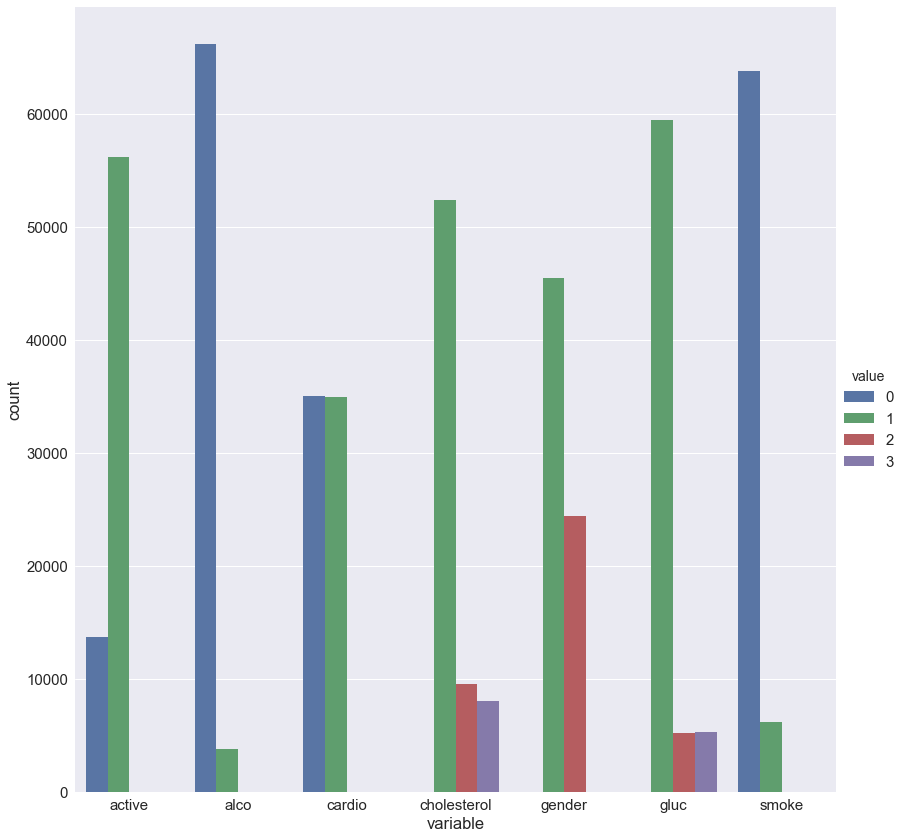

In [6]:
features = ['gender','cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
uniques = pd.melt(frame=df, value_vars=features)
uniques = pd.DataFrame(uniques.groupby(['variable', 'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
sns.factorplot(x='variable', y='count', hue='value', data=uniques, kind='bar', size=12)

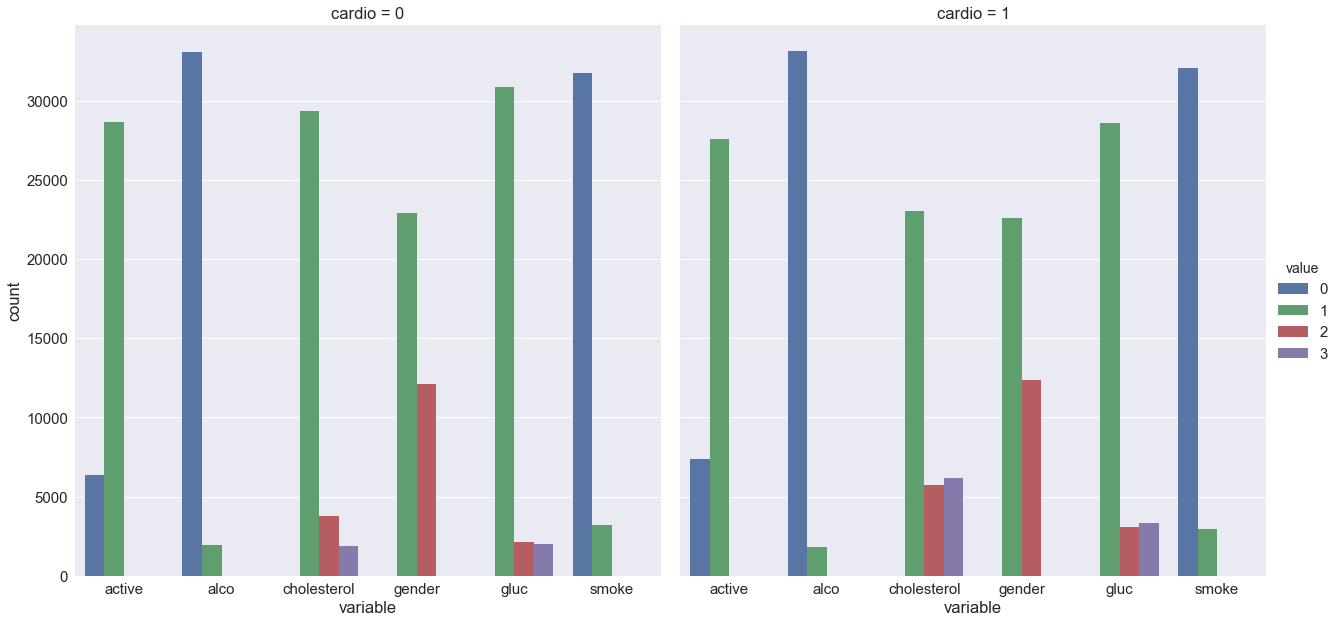

In [7]:
features_wo_cardio = ['gender','cholesterol', 'gluc', 'smoke', 'alco', 'active']
uniques = pd.melt(frame=df, value_vars=features_wo_cardio, id_vars=['cardio'])
uniques = pd.DataFrame(uniques.groupby(['variable', 'value', 'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
sns.factorplot(x='variable', y='count', hue='value', col='cardio', data=uniques, kind='bar', size=9)

In [30]:
# Строим корреляционную матрицу
corr = filtered_df.corr()

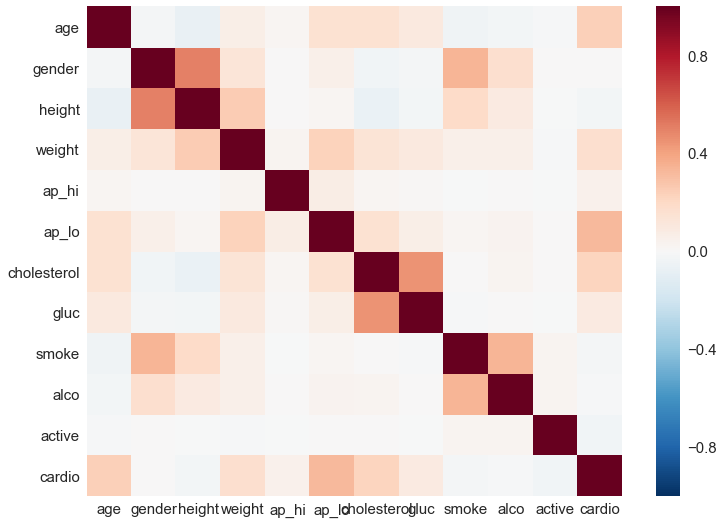

In [31]:
sns.heatmap(corr)

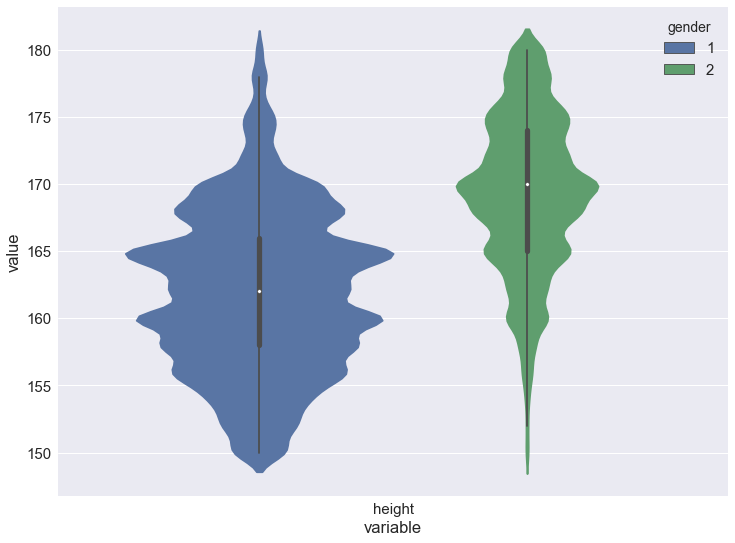

In [9]:
vdf = pd.melt(filtered_df, value_vars=["height"], id_vars='gender')
sns.violinplot(x='variable', y='value', hue='gender', data=vdf, scale='count')

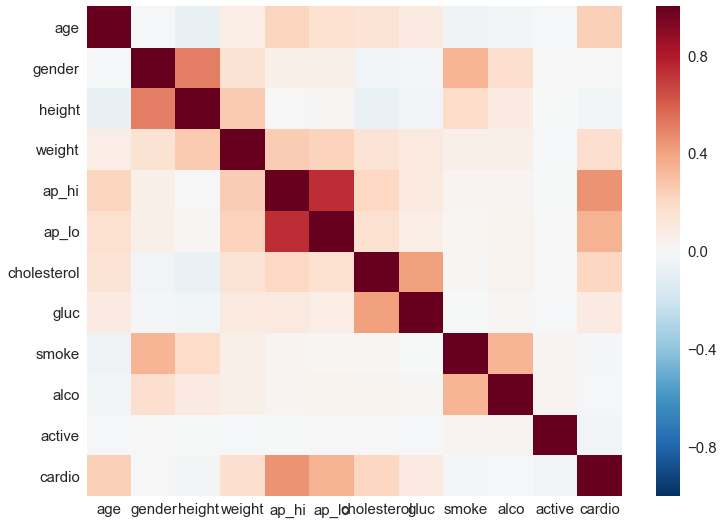

In [32]:
sns.heatmap(filtered_df.corr(method='spearman'))

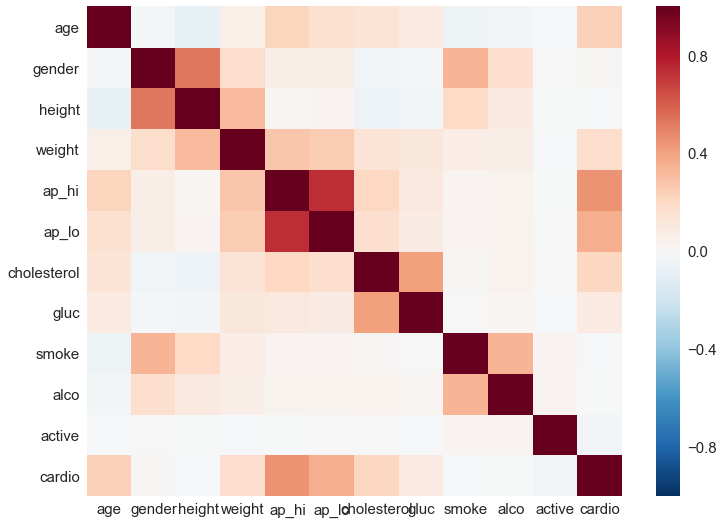

In [33]:
sns.heatmap(df.corr(method='spearman'))

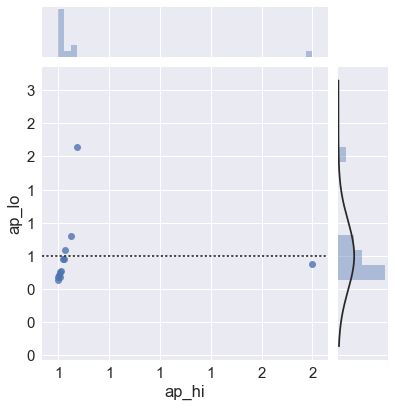

In [65]:
g = sns.jointplot("ap_hi", "ap_lo", data=corr, kind='resid') # 'reg'
"""Сетка"""
g.ax_joint.grid(True) 

"""Преобразуем логарифмические значения на шкалах в реальные"""
g.ax_joint.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))
g.ax_joint.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))

In [66]:
df['age_years'] = (df['age'] // 365.25).astype(int)

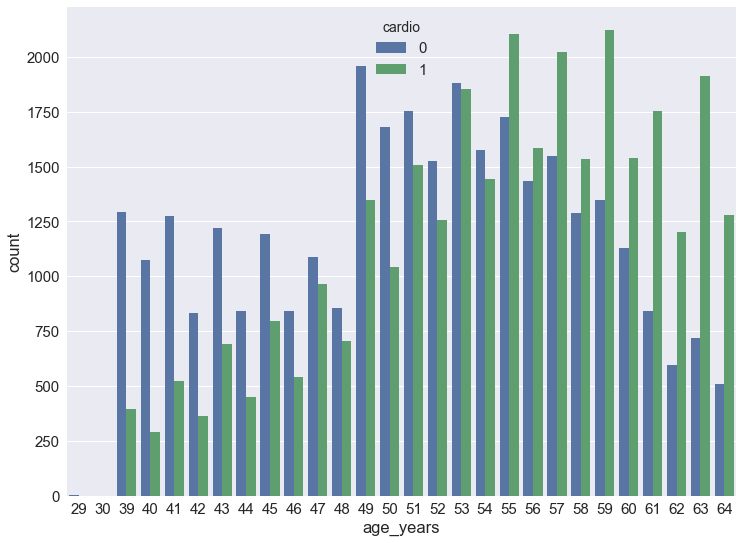

In [53]:
sns.countplot(x='age_years', hue='cardio', data=filtered_df)